
1.   Load Data
2.   Augment Data
4.   CNN Architecture
*   Pre trained Model Selection
*   Hyper-Perameters Selection
5.   Evaluation
6.   Result Visualization


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [10]:
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import pickle
from keras.datasets import imdb
from keras import Sequential, layers
from numpy import array
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
import pandas as pd
import csv
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.applications.vgg16 import preprocess_input
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from numpy import asarray, zeros
import os
import glob
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
from natsort import natsorted
from operator import itemgetter
from google.colab import files
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from natsort import natsorted
from operator import itemgetter
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tarfile
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
import numpy as np
from keras.applications import xception
import tensorflow as tf
from keras import backend as K
from keras.utils import np_utils
import scipy as scp
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
import numpy as np
from sklearn import metrics
import matplotlib as mpl
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve



UNZIP Train data

In [5]:
my_tar = tarfile.open('/content/drive/MyDrive/Copy of train_and_val_set.tar')
my_tar.extractall('./my_folder') # specify which folder to extract to
my_tar.close()

LOAD DATA

In [7]:
#Read npy annotations in list data structure
def loadAnnotations(path):
  expressions = []
  arousal = []
  valence = []
  landmarks = []
  for filename in os.listdir(path):
    x = path + filename
    if filename.endswith('exp.npy'):
      a = np.load(x)
      expressions.append([int(a), filename])  
    elif filename.endswith("val.npy"):
       a = np.load(x)
       valence.append([float(a),filename]) 
    elif filename.endswith("aro.npy"):
      a = np.load(x)
      arousal.append([float(a),filename]) 
    elif filename.endswith("lnd.npy"):  
      a = np.load(x)
      landmarks.append([a, filename])
  expressions = np.array(expressions)
  arousal = np.array(arousal)
  valence = np.array(valence)
  landmarks = np.array(landmarks)
  
  #count =1
  #with open(path, "r") as f_in:
    #reader = csv.reader(f_in)
    #next(reader)  # skip headers
    #for line in reader:
      # imgpath.append(str(line[1]))  
      #expressions.append(float(line[3]))  
      #valence.append(float(line[5]))
      #arousal.append(float(line[4]))  
      #landmarks.append(str(line[2]))
      #count = 1 + count
      #if(count==20000):
        #break 
  #return expressions, arousal, valence, landmarks
  return expressions, arousal, valence, landmarks
  #Load Image Path in a list
def loadImagePath(path):
  imgpath = []
  count = 0
  for filename in os.listdir(path):
    print(str(path) + "/"  + str(filename))
    imgpath.append([path + filename, filename])
  #with open(path, "r") as f_in:
    #reader = csv.reader(f_in)
    #next(reader)  # skip headers
    #for line in reader:
      #imgpath.append(str(line[1]))
      #count = 1 + count
      #if(count==20000):
        #break 
  imgpath = np.array(imgpath)   
  return imgpath
  #Sort Loaded Data so all annotations match with their corresponding images
def sortDatainUniOrder(path, path2):
  imgpath = loadImagePath(path2)
  exp,val,ars,lnd = loadAnnotations(path)
  imgpath = np.array(natsorted(imgpath, key=itemgetter(1)))
  expressions = np.array(natsorted(exp, key=itemgetter(1)))
  arousal = np.array(natsorted(ars, key=itemgetter(1)))
  valence = np.array(natsorted(val, key=itemgetter(1)))
  landmarks = np.array(natsorted(lnd, key=itemgetter(1)))
  imgpath = np.delete(imgpath, 1, 1)
  expressions = np.delete(expressions, 1, 1)
  arousal = np.delete(arousal, 1, 1)
  valence = np.delete(valence, 1, 1)
  landmarks = np.delete(landmarks, 1, 1)
  valence = valence.flatten()
  imgpath = imgpath.flatten()
  expressions = expressions.flatten()
  arousal = arousal.flatten()
  landmarks = landmarks.flatten()
  data = [row.split('\t') for row in valence]
  data = np.array(data, dtype='float')
  data1 = [row.split('\t') for row in arousal]
  data1 = np.array(data1, dtype='float')
  data2 = [row.split('\t') for row in expressions]
  data2 = np.array(data2, dtype='float')
  data3 = [row.split('\t') for row in imgpath]
  data3 = np.array(data3, dtype= 'str')
  data4 = [row.split('\t') for row in landmarks]
  data4 = np.array(data4, dtype= 'str')
  valence = data.flatten()
  expressions = data2.flatten()
  arousal = data1.flatten()
  imagepath = data3.flatten()
  landmarks = data4.flatten()
  vln = []
  exp = []
  ars = []
  landmark = []
  imgpaths = []
  for i in range(valence.size):
    a = valence[i]
    vln.append(a)
    a = arousal[i]
    ars.append(a)
    a = expressions[i]
    exp.append(a)
    a = imgpath[i]
    imgpaths.append(a)
    
    a = landmarks[i]
    landmark.append(a)
  return expressions, arousal, valence, landmarks, imgpath
#LoadImage  
def loadImages(imgpath):
  count = 0
  x_data = []
  for i in range(imgpath.size):
    image = cv2.imread(imgpath[i])
    count = count+1
    print(count)
    x_data.append(image) 
  x_data = np.array(x_data)   
  return x_data    
 #Augment data into 5 different augmentations 
def dataAugment(images, folder, path ):
  
  # Initialising the ImageDataGenerator class.
  # We will pass in the augmentation parameters in the constructor.
  datagen = ImageDataGenerator(
      rotation_range = 40,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      brightness_range = (0.5, 1.5))
  images = np.array(images)
  # Loading a sample image
  for i in range(images.size):
    img = load_img(images[i])
  # Converting the input sample image to an array
    x = img_to_array(img)
  # Reshaping the input image
    x = x.reshape((1, ) + x.shape)

  # Generating and saving 5 augmented samples
  # using the above defined parameters.
    i = 0
    for batch in datagen.flow(x, batch_size = 1,
              save_to_dir =folder,
              save_prefix =path, save_format ='jpeg'):
      i += 1
      if i > 5:
        break
 #Load Augmented Data       
def loaddataAugmentation(images,folder,path, exp, val,ars,lnd):
  dataAugment(images, folder, path)
  vln = []
  exp = []
  ars = []
  landmark = []
  for i in range(val.size):
    a = val[i]
    b = ars[i]
    c = exp[i]
    e = lnd[i]
    for j in range(6):
      ars.append(a)
      vln.append(b)
      exp.append(c)
      landmark.append(e)  
  exp = np.array(exp)
  vln = np.array(vln)
  ars = np.array(ars)
  landmark = np.array(landmark)    
  cv_img = []
  path = str(path) + "/*.jpeg"
  for img in glob.glob(path):
    n= cv2.imread(img)
    cv_img.append(n)
  return vln, exp, ars, lnd, cv_img 
 

Accuruacy Measures

In [9]:
def rmse(true, pred):
  return np.sqrt(np.mean((true-y)**2))
def sagr(true, pred):
    return np.mean(np.sign(true) == np.sign(pred))
def pcc(true,pred):
 return np.corrcoef(true, pred)[0,1]
def CCC(true, pred):
  mean_pred = np.mean(pred)
  mean_gt = np.mean(true)
  std_pred= np.std(pred)
  std_gt = np.std(true)
  pearson = pcc(true, pred)
  a = (2.0*pearson*std_pred*std_gt/(std_pred**2+std_gt**2+(mean_pred-mean_gt)**2) )
  return a    
def roccurve(true, pred):
    
  #One-hot encoder

  y_valid=np.reshape(true, (-1,1))
  ypred=np.reshape(pred, (-1,1))
  y_valid = pd.DataFrame(true)
  ypred=pd.DataFrame(pred)

  onehotencoder = OneHotEncoder()
  y_valid= onehotencoder.fit_transform(y_valid).toarray()
  ypred = onehotencoder.fit_transform(ypred).toarray()

  n_classes = ypred.shape[1]

  # Plotting and estimation of FPR, TPR
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid[:, i], ypred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    classes = cycle(['0', '1', '2', '3', '4', '5', '6', '7'])
  for i, color in zip(range(n_classes), classes):
      plt.plot(fpr[i], tpr[i],  lw=2,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for multi-class data')
  plt.legend(loc="lower right")
  plt.show()
def aucCurva(true, pred):
  y_valid=np.reshape(true, (-1,1))
  ypred=np.reshape(pred, (-1,1))
  y_valid = pd.DataFrame(true)
  ypred=pd.DataFrame(pred)
  onehotencoder = OneHotEncoder()
  y_valid= onehotencoder.fit_transform(y_valid).toarray()
  ypred = onehotencoder.fit_transform(ypred).toarray()
  precision, recall, thresholds = precision_recall_curve(y_valid[:, i], ypred[:, i])
  # Use AUC function to calculate the area under the curve of precision recall curve
  auc_precision_recall = auc(recall, precision)
  print(auc_precision_recall)
  plt.plot(recall, precision)
  plt.show()  
def checkCorrectIncorrect(landmarks,images,mdl,exp):
  for i in range (10):
      a = random.randint(0,450)
      x = landmarks[a]
      xt = images[a]
      imgplot = plt.imshow(xt)
      plt.show()
      x = np.reshape(x, (1,68,2,1))
      xt = np.reshape(xt, (1,224,224,3))
      pred = mdl.predict([x,xt])
      pred = np.argmax(pred, axis = 1)
      z = exp[a].astype(int) == pred.astype(int)
      if(z == 0):
        e = str(exp[a])
        print (str("Inccorect classification- True label ")+ e)
      elif(z==1): 
        print (str("Correctly classified")+ e)
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')       


In [ ]:
trainingimgPath = loadImagePath("/content/my_folder/train_set/annotations")
trexp, trars, trvln, trlandmark = loadAnnotations("/content/my_folder/train_set/images")
x_train = loadImages(np.array(trainingimgPath))
vln,exp,ars,lnd =[]
vln, exp, ars, lnd, x_train = loaddataAugmentation(x_train, "augmentedData", "/content/drive/MyDrive/augmentedData",trexp,trvln,trars,trlandmark)

In [ ]:
trainingimgPath

array(['/content/my_folder/train_set/images/0.jpg',
       '/content/my_folder/train_set/images/1.jpg',
       '/content/my_folder/train_set/images/2.jpg', ...,
       '/content/my_folder/train_set/images/14348.jpg',
       '/content/my_folder/train_set/images/14349.jpg',
       '/content/my_folder/train_set/images/14350.jpg'], dtype='<U45')

In [195]:
testingimgPath = loadImagePath("/content/drive/MyDrive/testing_dataA2/val_set/images")
tsexp, tsars, tsvln, tslandmark = loadAnnotations("/content/drive/MyDrive/testing_dataA2/val_set/annotations")
x_test = loadImages(np.array(testingimgPath))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [ ]:
x_train = np.array(x_train) 
x_test = np.array(x_test) 

In [205]:
xlandmarks = StandardScaler().fit_transform(trlandmark)
testlandmarks = StandardScaler().fit_transform(tslandmark)

In [206]:
xlandmarks = np.reshape(trlandmark, (20000 ,68,2,1))
testlandmarks = np.reshape(tslandmark, (400 ,68,2,1))

In [207]:
x_train

array([[[[ 92, 149, 170],
         [ 98, 155, 176],
         [ 96, 155, 175],
         ...,
         [126, 178, 190],
         [127, 179, 191],
         [128, 180, 192]],

        [[ 99, 156, 177],
         [ 97, 154, 175],
         [ 91, 148, 169],
         ...,
         [125, 177, 189],
         [127, 179, 191],
         [128, 180, 192]],

        [[105, 160, 181],
         [ 91, 148, 169],
         [ 81, 138, 159],
         ...,
         [125, 177, 189],
         [127, 179, 191],
         [128, 180, 192]],

        ...,

        [[ 15,  10,   7],
         [ 12,   7,   4],
         [ 13,   8,   5],
         ...,
         [ 95, 138, 135],
         [ 95, 138, 135],
         [ 96, 139, 136]],

        [[ 16,  11,   8],
         [ 13,   8,   5],
         [ 12,   7,   4],
         ...,
         [ 95, 138, 135],
         [ 95, 138, 135],
         [ 94, 137, 134]],

        [[ 17,  12,   9],
         [ 13,   8,   5],
         [ 12,   7,   4],
         ...,
         [ 95, 138, 135],
        

DEFINE CNN Architectures

In [453]:
def vgg(mdl):
  inputs1 = Input(shape=(68,2,1))
  conv1 = Conv2D(filters=1, kernel_size=1, padding = 'same', activation='relu')(inputs1)
  conv1 = Conv2D(filters=1, kernel_size=1, padding = 'same', activation='relu')(conv1)
  pool1 = MaxPooling2D(pool_size=2)(conv1)
  x1 = BatchNormalization()(pool1)
  #pool2 = MaxPooling2D(pool_size=2)(conv2)
  #drop1 = Dropout(0.5)(conv2)
  flat1 = Flatten()(x1)
  base_model = VGG16 (weights='imagenet', include_top=False)
  x = base_model.output
  x = Conv2D(filters=1, kernel_size=1, padding = 'same',strides = 2, activation='relu')(x)
  x = GlobalAveragePooling2D () (x)

  flat2 = Flatten()(x)

  merged = concatenate([flat1, flat2])

  x = Dense (10, activation='sigmoid') (merged)
  #x = Dropout (0.5) (x)
  #x = Dense (60, activation='relu') (x)
  x = Dense (10, activation='sigmoid') (x)
  x = BatchNormalization()(x)

  predictions = Dense(8, activation='softmax')(x)
  model = Model([inputs1, base_model.input], predictions)
  for layer in base_model.layers:
      layer.trainable = False
  model = Model(inputs=[inputs1, base_model.input], outputs=predictions)
  # compile
  if(mdl == " classify"):
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif(mdl == "valregress"): 
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
  elif(mdl == "arsregress"): 
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
  # summarize
  print(model.summary())
  plot_model(model, show_shapes=True, to_file='multichannel.png')
  return model

In [333]:
#model = keras.models.load_model('/content/val_weights.h5')
mdl = vgg("valregress")
history=mdl.fit ([xlandmarks, x_train/255], vln, epochs=5, batch_size=100)
#x = model.predict([xlandmarks,x_train])

Model: "model_41"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_48 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_48[0][0]']               
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                                64)                                                        

In [ ]:
plt.plot(history1.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [454]:
mdl = vgg("arsregress")
history=mdl.fit ([xlandmarks, x_train/255], ars, epochs=5, batch_size=100)

Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_52 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_52[0][0]']               
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                                64)                                                        

Xception Model

In [481]:
def xcept(mdl):
  inputs1 = Input(shape=(68,2,1))
  conv1 = Conv2D(filters=1, kernel_size=1, padding = 'same', activation='relu')(inputs1)
  conv1 = Conv2D(filters=1, kernel_size=1, padding = 'same', activation='relu')(conv1)
  pool1 = MaxPooling2D(pool_size=2)(conv1)
  x1 = BatchNormalization()(pool1)
  #pool2 = MaxPooling2D(pool_size=2)(conv2)
  #drop1 = Dropout(0.5)(conv2)
  flat1 = Flatten()(x1)
  base_model = xception.Xception(weights='imagenet',
                            include_top=False,
                            input_shape=(224, 224, 3))
  x = base_model.output
  flat2 = Flatten()(x)

  merged = concatenate([flat1, flat2])

  x = Dense (10, activation='sigmoid') (merged)
  #x = Dropout (0.5) (x)
  #x = Dense (60, activation='relu') (x)
  x = Dense (10, activation='sigmoid') (x)
  x = BatchNormalization()(x)

  predictions = Dense(8, activation='softmax')(x)
  model = Model([inputs1, base_model.input], predictions)
  for layer in base_model.layers:
      layer.trainable = False
  model = Model(inputs=[inputs1, base_model.input], outputs=predictions)
  # compile
  if(mdl == " classify"):
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif(mdl == "valregress"): 
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
  elif(mdl == "arsregress"): 
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
  # summarize
  print(model.summary())
  plot_model(model, show_shapes=True, to_file='multichannel.png')
  return model

In [320]:
mdl = xcept("valregress")

Model: "model_37"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_44 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_44[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [482]:
mdle = xcept("arsregress")

Model: "model_47"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_54 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_54[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [483]:
mdle.fit([xlandmarks, x_train], ars, epochs = 10, batch_size= 10)

Epoch 1/10
100/100 [==============================] - 17s 104ms/step - loss: 0.0905 - mse: 0.0905
Epoch 2/10
100/100 [==============================] - 10s 103ms/step - loss: 0.0894 - mse: 0.0894
Epoch 3/10
100/100 [==============================] - 10s 102ms/step - loss: 0.0893 - mse: 0.0893
Epoch 4/10
100/100 [==============================] - 10s 102ms/step - loss: 0.0893 - mse: 0.0893
Epoch 5/10
100/100 [==============================] - 10s 102ms/step - loss: 0.0893 - mse: 0.0893
Epoch 6/10
100/100 [==============================] - 10s 102ms/step - loss: 0.0893 - mse: 0.0893
Epoch 7/10
100/100 [==============================] - 10s 102ms/step - loss: 0.0893 - mse: 0.0893
Epoch 8/10
100/100 [==============================] - 10s 103ms/step - loss: 0.0893 - mse: 0.0893
Epoch 9/10
100/100 [==============================] - 10s 103ms/step - loss: 0.0893 - mse: 0.0893
Epoch 10/10
100/100 [==============================] - 10s 102ms/step - loss: 0.0893 - mse: 0.0893


In [321]:
mdl.fit([xlandmarks, x_train], vln, epochs = 10, batch_size= 10)

Epoch 1/10
100/100 [==============================] - 14s 102ms/step - loss: 0.2740 - mse: 0.2740
Epoch 2/10
100/100 [==============================] - 10s 101ms/step - loss: 0.2738 - mse: 0.2738
Epoch 3/10
100/100 [==============================] - 10s 102ms/step - loss: 0.2738 - mse: 0.2738
Epoch 4/10
100/100 [==============================] - 10s 103ms/step - loss: 0.2738 - mse: 0.2738
Epoch 5/10
100/100 [==============================] - 10s 103ms/step - loss: 0.2738 - mse: 0.2738
Epoch 6/10
100/100 [==============================] - 10s 104ms/step - loss: 0.2738 - mse: 0.2738
Epoch 7/10
100/100 [==============================] - 10s 104ms/step - loss: 0.2738 - mse: 0.2738
Epoch 8/10
100/100 [==============================] - 10s 105ms/step - loss: 0.2738 - mse: 0.2738
Epoch 9/10
100/100 [==============================] - 11s 106ms/step - loss: 0.2738 - mse: 0.2738
Epoch 10/10
100/100 [==============================] - 10s 104ms/step - loss: 0.2738 - mse: 0.2738


In [267]:
history1 = mdl.fit ([xlandmarks, x_train/255], exp, epochs=50, batch_size=100)


Epoch 1/50
10/10 [==============================] - 13s 853ms/step - loss: 2.0772 - accuracy: 0.2590
Epoch 2/50
10/10 [==============================] - 8s 848ms/step - loss: 1.8191 - accuracy: 0.3980
Epoch 3/50
10/10 [==============================] - 8s 851ms/step - loss: 1.7091 - accuracy: 0.5070
Epoch 4/50
10/10 [==============================] - 9s 851ms/step - loss: 1.5817 - accuracy: 0.6030
Epoch 5/50
10/10 [==============================] - 9s 852ms/step - loss: 1.4656 - accuracy: 0.6520
Epoch 6/50
10/10 [==============================] - 9s 857ms/step - loss: 1.3690 - accuracy: 0.6820
Epoch 7/50
10/10 [==============================] - 9s 856ms/step - loss: 1.2703 - accuracy: 0.7110
Epoch 8/50
10/10 [==============================] - 8s 850ms/step - loss: 1.1793 - accuracy: 0.7410
Epoch 9/50
10/10 [==============================] - 9s 856ms/step - loss: 1.0767 - accuracy: 0.7660
Epoch 10/50
10/10 [==============================] - 9s 855ms/step - loss: 0.9782 - accuracy: 0.778

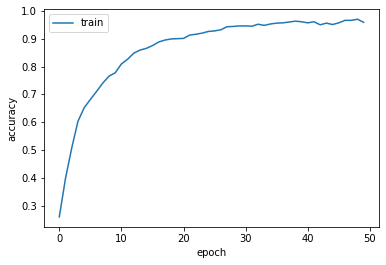

In [294]:
plt.plot(history1.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [215]:
mdl.save("xceptionweights.h5")

VGG16

In [301]:

model = keras.models.load_model('/content/vgg.h5')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.31      0.75      0.44        83
           1       0.57      0.95      0.71       151
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        28

    accuracy                           0.46       450
   macro avg       0.11      0.21      0.14       450
weighted avg       0.25      0.46      0.32       450



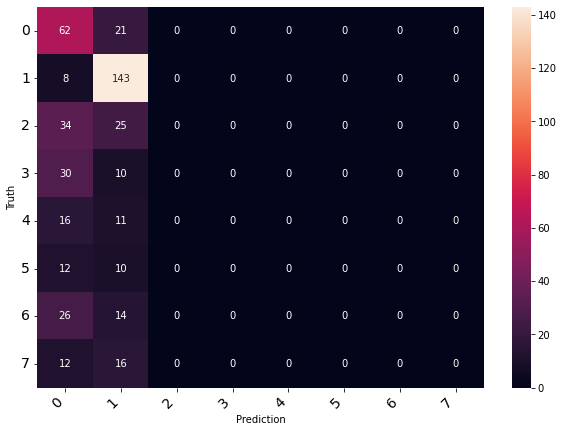

In [306]:
class_names = ['0','1','2','3','4','5','6','7']
x = model.predict([testlandmarks,x_test/255])
cnf_matrix = confusion_matrix(tsexp, np.argmax(x, axis = 1))
print_confusion_matrix(cnf_matrix,class_names)
print(classification_report(tsexp, np.argmax(x, axis = 1), target_names=class_names))

Xception


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.53      0.78      0.63        83
           1       0.79      0.94      0.86       151
           2       0.45      0.25      0.33        59
           3       0.20      0.50      0.28        40
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        22
           6       0.71      0.25      0.37        40
           7       0.00      0.00      0.00        28

    accuracy                           0.56       450
   macro avg       0.34      0.34      0.31       450
weighted avg       0.51      0.56      0.51       450



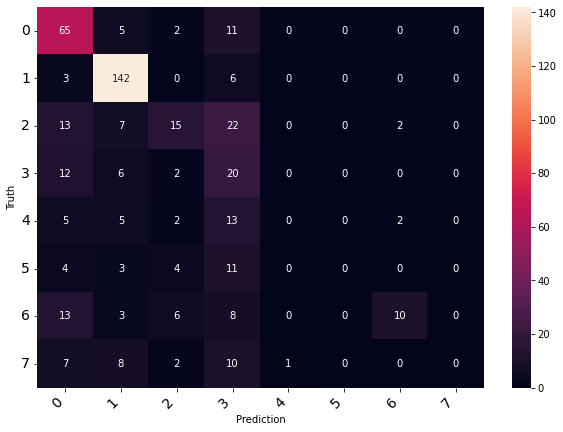

In [412]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['0','1','2','3','4','5','6','7']
xy = model.predict([testlandmarks,x_test/255])
cnf_matrix = confusion_matrix(tsexp, np.argmax(xy, axis = 1))
print_confusion_matrix(cnf_matrix,class_names)
print(classification_report(tsexp, np.argmax(xy, axis = 1), target_names=class_names))

In [413]:
xy = np.argmax(xy, axis=1)
xy

array([2, 1, 6, 0, 3, 3, 2, 1, 3, 0, 3, 1, 1, 3, 3, 2, 0, 1, 2, 3, 3, 0,
       0, 0, 1, 0, 3, 0, 1, 3, 0, 3, 3, 2, 0, 3, 1, 1, 1, 1, 3, 0, 2, 3,
       3, 3, 2, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 0, 1, 3, 3,
       0, 1, 3, 1, 3, 1, 3, 0, 0, 2, 3, 0, 1, 3, 1, 3, 0, 3, 1, 3, 3, 2,
       1, 0, 1, 2, 3, 1, 3, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 3,
       1, 0, 3, 3, 1, 3, 0, 3, 3, 3, 1, 3, 1, 1, 0, 1, 0, 3, 1, 3, 3, 3,
       3, 0, 3, 3, 3, 0, 2, 0, 0, 6, 3, 2, 3, 3, 1, 1, 0, 1, 3, 0, 3, 1,
       1, 0, 0, 6, 1, 0, 3, 0, 0, 2, 3, 1, 3, 0, 3, 3, 1, 1, 0, 3, 0, 3,
       3, 1, 0, 0, 3, 0, 3, 3, 0, 2, 3, 6, 3, 3, 0, 1, 1, 3, 1, 3, 3, 0,
       0, 3, 1, 0, 0, 1, 0, 6, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 3, 0,
       3, 0, 0, 3, 0, 3, 3, 1, 0, 0, 2, 1, 0, 1, 3, 1, 1, 1, 3, 0, 0, 1,
       1, 2, 0, 1, 0, 1, 3, 1, 3, 0, 0, 1, 6, 6, 2, 1, 1, 1, 2, 1, 0, 0,
       1, 3, 1, 1, 0, 1, 1, 3, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 3, 4, 1,
       2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,

VGG 16 Cohen Kappa


In [356]:
c = cohen_kappa_score(tsexp,x)
print(x)

0.2558218022274722

XCEPTION COHEN KAPPA

In [328]:
c = cohen_kappa_score(tsexp,xy)
print(xy)


0.4020748004424647

In [484]:
y = mdle.predict([testlandmarks,x_test])


In [485]:
y = np.array(y)
y = np.reshape(y, (450,8))

In [486]:
np.mean(vln.astype(int) == np.argmax(y, axis = 1).astype(int))
y = np.argmax(y, axis = 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


RMSE XCEPTION Arousal

In [488]:
c = rmse(tsexp, y)
print(c)


3.8088503811588703


SAGR XCEPTION Arousal

In [489]:
c =sagr(tsexp, y)
print(c)

0.6844444444444444

CCC XCEPTION Arousal


In [491]:
c = CCC(tsexp, y)
print(c)

-0.0002117657274166325


In [66]:
model.save("val_weights.h5")

In [133]:

model = keras.models.load_model('/content/val_weights.h5')

In [393]:
xy = np.argmax(xy, axis = 1)

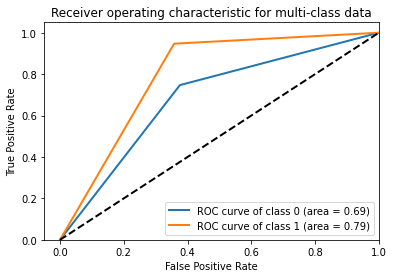

In [493]:
roc_curve(tsexp, xy)

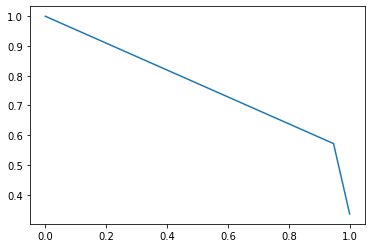

In [496]:
auc(tsexp,xy)

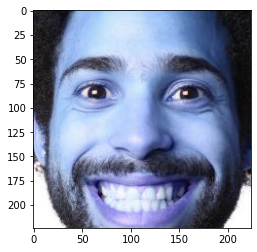

Inccorect classification- True label 1.0


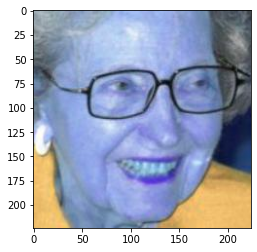

Inccorect classification- True label 1.0


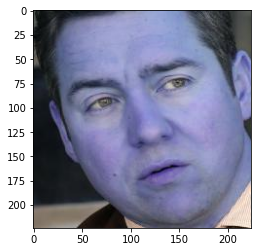

Inccorect classification- True label 5.0


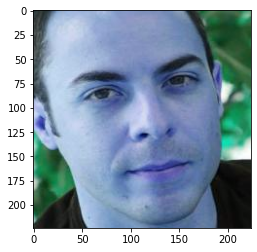

Correctly classified5.0


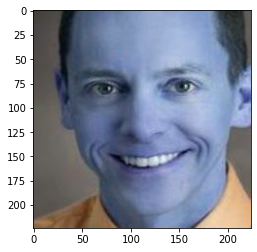

Inccorect classification- True label 1.0


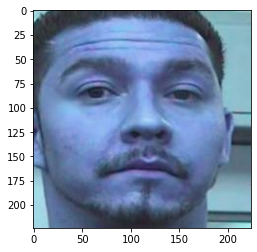

Inccorect classification- True label 3.0


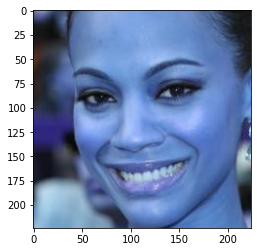

Inccorect classification- True label 1.0


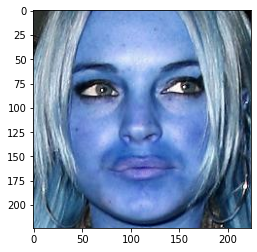

Inccorect classification- True label 5.0


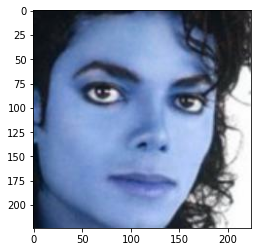

Correctly classified5.0


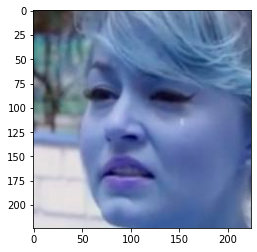

Inccorect classification- True label 2.0


In [557]:
checkCorrectIncorrect(testlandmarks, x_test,mdl,tsexp)